In [1]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate

In [6]:
data= pd.read_csv("/content/synthetic_credit_card_approval.csv")
data.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1


In [7]:
print(data.columns.values)

['Num_Children' 'Group' 'Income' 'Own_Car' 'Own_Housing' 'Target']


In [9]:
data = data[['Num_Children', 'Group', 'Income', 'Own_Car', 'Own_Housing', 'Target']]
data = pd.get_dummies(data, drop_first=True)


In [10]:
print(data.columns.values)

['Num_Children' 'Group' 'Income' 'Own_Car' 'Own_Housing' 'Target']


In [11]:
# Split data into features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.97252


<Axes: title={'center': 'Selection Rate by Group'}, xlabel='Group', ylabel='Selection Rate'>

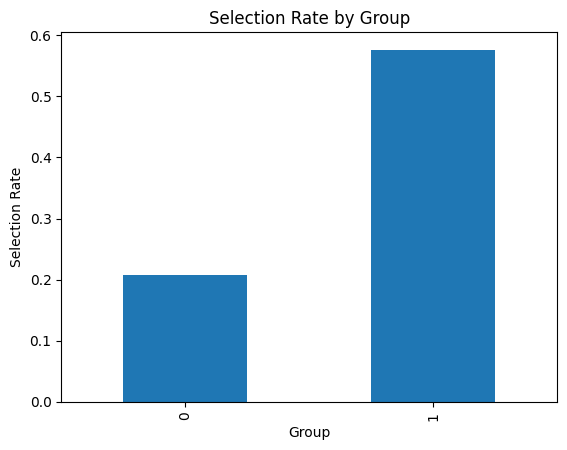

In [12]:
# Create a MetricFrame
metric_frame = MetricFrame(metrics=selection_rate,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=X_test["Group"])

# Plot the selection rates
metric_frame.by_group.plot.bar(
    legend=False,
    ylabel="Selection Rate",
    title="Selection Rate by Group",
)

In [13]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

In [14]:
# Define base estimator
estimator = LogisticRegression(max_iter=1000)

# Train the estimator
estimator.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Apply fairness constraint: Demographic Parity
fair_model = ExponentiatedGradient(
    estimator,
    constraints=DemographicParity(),
    eps=0.01  # fairness tolerance
)

In [17]:
# Define sensitive features for the test set
sf_test = X_test["Group"]

# Evaluate fairness and accuracy
metric_frame = MetricFrame(
    metrics={
        "Selection Rate": selection_rate,
        "Accuracy": accuracy_score
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sf_test
)

# Print the overall and by-group metrics
print("Overall metrics:")
print(metric_frame.overall)
print("\nMetrics by group:")
print(metric_frame.by_group)
print("\nOverall Accuracy:", accuracy_score(y_test, y_pred))

Overall metrics:
Selection Rate    0.39183
Accuracy          0.97252
dtype: float64

Metrics by group:
       Selection Rate  Accuracy
Group                          
0            0.206975  0.969714
1            0.576124  0.975318

Overall Accuracy: 0.97252
